1. Из текстуальных данных с использованием алгоритмов кластеризации найти похожие. 
2. В выводах обосновать какие метрики и алгоритмы лучше использовать для решения вышеизложенных задач.

In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import spacy 
from spacy.lang.ru import Russian
from spacy.lang.ru.stop_words import STOP_WORDS
nlp = spacy.load("ru_core_news_sm")

from gensim.models import Word2Vec

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import pymorphy2
morph = pymorphy2.MorphAnalyzer() #добавление анализатора для морфологического анализа текста

from collections import Counter

#загрузим текст
inp = open('Palata-6.txt')
book = inp.read() #оригинальный загруженный файл
#убираем табуляцию и ненужные знаки препинания
def clean_data(clean_string):
    clean_string = re.sub('I', '', clean_string)
    clean_string = re.sub('V', '', clean_string)
    clean_string = re.sub('X', '', clean_string)
    clean_string = re.sub('[\n«»:;,–]', ' ', clean_string)
    clean_string = " ".join(clean_string.split())
    return clean_string

clean_book = clean_data(book)

nlp_book = nlp(clean_book) #приводим к nlp модели, чтобы токенизации и более глубокой очистке текста


def clean_sent(sentense):
    lemm_words = []
    clean_sent = re.sub('[.?!]', '', sentense)
    words = clean_sent.split()
    for item in words:
        lemm_words.append(morph.parse(item)[0].normal_form) #лемматизация предложения
    lemm_words_without_sw = [word for word in lemm_words if not word in STOP_WORDS] #удаление стоп слов
    return lemm_words_without_sw

cleaned_text = []
for sent in nlp_book.sents:
    sentense = clean_sent(sent.text)
    cleaned_text.append(sentense)

## После очистки текста векторизируем слова. Для векторизации применяем метод word2vec

In [2]:
model = Word2Vec(min_count=1, window = 3, sorted_vocab = True)
model.build_vocab(cleaned_text)
model.train(cleaned_text, total_examples=model.corpus_count, epochs=model.epochs)

(47196, 49620)

## После векторизации соберем уникальные слова в отедльный датафрейм для уменьшения размерности и последующей визуализации. Для уменьшения размерности будет использоваться PCA, а затем TSNE

In [3]:
list_of_words = [item for sublist in cleaned_text for item in sublist]
unique_words = set(list_of_words)
unique_words = list(unique_words)

In [4]:
df_unique_words =  pd.DataFrame()

def insert_vectors_in_df(word):
    vector = model.wv.get_vector(word)
    df_unique_words[word] = vector
    
    
for word in unique_words:
    insert_vectors_in_df(word)
    
df_unique_words

C:\Users\User\AppData\Local\Temp/ipykernel_2064/1304836199.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unique_words[word] = vector


,вера,оттенок,тишина,показаться,постесняться,тестово,решить,грудь,закрывать,лишение,...,женим…,ставник,странно…,по-военному,небытие,упорно,стричь,заблестеть,пожаловать…,вздрагивать
0,-0.000408,-0.003933,0.004184,0.002905,0.003914,0.002986,-0.004276,0.003831,-0.004226,0.002615,...,-0.002391,-0.000667,-0.004850,-0.002418,0.001580,0.002341,0.004394,0.004011,0.002033,0.003343
1,0.003164,-0.003804,0.002643,-0.003497,-0.004739,0.001782,-0.003127,0.002276,-0.001214,0.004325,...,-0.001781,0.000675,0.001641,0.000753,0.001097,0.002318,0.001042,-0.000593,-0.003757,-0.004488
2,0.002670,-0.003654,0.003859,0.001387,-0.004823,0.002095,0.002742,-0.000461,0.002276,0.000605,...,0.002788,-0.004528,-0.004857,-0.003311,-0.001792,-0.003467,-0.000977,-0.003000,-0.001347,-0.000506
3,-0.003251,0.001977,0.003411,0.003135,0.001317,-0.001886,0.004503,0.002292,-0.003676,-0.004499,...,0.000344,-0.003447,0.004089,0.002467,0.002144,0.004620,0.000074,0.003338,0.002316,0.003144
4,0.002768,-0.003760,-0.002901,-0.003401,-0.002255,0.002833,-0.001244,0.001335,-0.003981,0.003115,...,0.002754,0.000365,-0.002629,0.004346,0.004954,-0.001555,-0.002467,0.001272,0.000907,-0.002395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.003263,-0.000370,-0.000148,0.002480,-0.001403,0.002830,-0.000370,-0.001841,-0.001969,-0.004710,...,-0.000270,-0.003725,0.002440,-0.000829,-0.000607,0.004136,0.003907,-0.001760,-0.000303,-0.000340
96,-0.002715,0.000980,0.003828,-0.003550,0.003500,-0.002424,0.003353,0.003242,-0.002060,-0.000676,...,-0.004180,-0.004391,-0.002566,0.004504,-0.001470,0.003689,-0.002766,-0.003030,-0.001570,0.001460
97,-0.003252,0.004032,-0.003759,0.000113,-0.004941,-0.004569,-0.000284,-0.003551,0.000846,0.000245,...,-0.003702,-0.003594,0.001637,-0.003813,-0.004262,-0.003360,0.003065,-0.002797,-0.004961,-0.004935
98,0.004711,0.003223,0.002665,-0.001269,-0.003506,-0.001019,-0.000112,0.004107,-0.001025,0.000617,...,-0.002518,0.004243,-0.004700,-0.003428,0.004977,0.004427,0.004380,0.002444,-0.001124,-0.001023


In [5]:
df_unique_words.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
вера,-0.000408,0.003164,0.002670,-0.003251,0.002768,-0.004475,-0.004773,-0.000887,0.003911,-0.001456,...,-0.002904,0.000366,-0.001939,0.003784,0.002533,-0.003263,-0.002715,-0.003252,0.004711,-0.004014
оттенок,-0.003933,-0.003804,-0.003654,0.001977,-0.003760,0.004145,0.000456,0.003760,-0.004068,0.000469,...,0.000624,-0.000692,-0.003321,-0.004952,-0.000610,-0.000370,0.000980,0.004032,0.003223,0.000631
тишина,0.004184,0.002643,0.003859,0.003411,-0.002901,0.004118,0.000122,0.001764,-0.003228,-0.002540,...,0.003495,0.001960,-0.002323,0.002899,-0.001726,-0.000148,0.003828,-0.003759,0.002665,-0.001129
показаться,0.002905,-0.003497,0.001387,0.003135,-0.003401,0.000759,-0.004253,0.001268,-0.001768,0.003127,...,0.004035,0.004813,0.002316,-0.003549,-0.002259,0.002480,-0.003550,0.000113,-0.001269,-0.002715
постесняться,0.003914,-0.004739,-0.004823,0.001317,-0.002255,0.004777,-0.003784,0.004341,0.001347,-0.003337,...,-0.000009,-0.002894,-0.003267,0.000338,0.000896,-0.001403,0.003500,-0.004941,-0.003506,-0.003782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
упорно,0.002341,0.002318,-0.003467,0.004620,-0.001555,-0.001865,-0.004742,-0.002859,0.001343,-0.003826,...,0.003217,-0.002493,-0.002821,0.003228,0.001214,0.004136,0.003689,-0.003360,0.004427,0.001426
стричь,0.004394,0.001042,-0.000977,0.000074,-0.002467,-0.002006,-0.001787,0.002300,0.002485,-0.001733,...,-0.001735,0.001320,-0.002847,-0.004882,-0.002828,0.003907,-0.002766,0.003065,0.004380,0.004947
заблестеть,0.004011,-0.000593,-0.003000,0.003338,0.001272,-0.001046,0.002978,-0.000286,-0.000723,0.000627,...,0.002203,0.002957,-0.004452,-0.000245,0.000893,-0.001760,-0.003030,-0.002797,0.002444,-0.000814
пожаловать…,0.002033,-0.003757,-0.001347,0.002316,0.000907,0.004147,-0.001127,0.003549,-0.000688,0.001420,...,-0.000678,-0.002146,0.004055,0.004856,-0.001194,-0.000303,-0.001570,-0.004961,-0.001124,0.000863


In [6]:
model_PCA = PCA(n_components=80)

df_PCA = model_PCA.fit_transform(df_unique_words.T)

df_PCA = pd.DataFrame(df_PCA, index=df_unique_words.columns)
df_PCA

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
вера,-0.000022,0.002005,-0.000587,0.001852,-0.009124,-0.001053,-0.001972,0.007740,0.007762,0.000381,...,0.000109,0.001744,0.002889,0.001923,-0.000463,-0.002343,0.002029,0.004297,0.002641,-0.003483
оттенок,0.001313,-0.001466,0.002243,0.001394,-0.002847,-0.000763,0.003096,-0.000137,-0.001671,0.001415,...,-0.000688,-0.000930,0.003126,0.000262,-0.001060,-0.002026,-0.003090,0.000966,-0.001999,0.004307
тишина,0.004020,-0.001965,-0.001461,0.000434,0.001570,0.003339,0.005217,-0.001725,-0.003288,0.004435,...,0.000649,0.000061,-0.001035,0.001253,-0.004301,0.000977,0.004216,0.000813,-0.000069,-0.001689
показаться,-0.002647,-0.001741,0.001063,-0.003762,0.003318,0.004878,-0.002387,0.002907,-0.002602,-0.000529,...,-0.000809,0.000339,-0.001714,-0.000196,0.001346,-0.000984,0.004311,0.001399,0.001839,0.001509
постесняться,-0.009173,0.004198,-0.002782,0.003867,-0.000897,0.000753,-0.003741,-0.002756,-0.000140,0.002253,...,-0.002019,0.008224,0.004227,0.000507,-0.001892,-0.002616,-0.003912,0.002853,-0.000558,0.002169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
упорно,0.000774,-0.004970,0.000494,0.000586,-0.004067,-0.002293,0.001589,-0.000421,-0.002165,0.002526,...,-0.001360,0.008282,0.003545,0.000600,-0.002399,0.002680,-0.002450,0.003136,0.003615,-0.003624
стричь,0.004550,-0.000620,-0.002163,-0.002085,-0.000290,-0.003333,0.002781,0.002333,-0.005269,0.002405,...,0.002292,-0.004508,-0.000120,-0.003780,0.003877,0.001385,-0.005705,0.000208,0.000358,0.006286
заблестеть,-0.000491,0.003696,-0.000839,0.000296,0.001307,-0.000883,0.003017,0.002839,0.002029,-0.004042,...,-0.003901,0.003525,-0.001024,0.001100,0.002230,-0.004691,-0.001605,0.000879,-0.003611,-0.000573
пожаловать…,-0.000634,0.003719,-0.005543,-0.004867,-0.000590,0.003263,0.000704,0.001527,0.000982,0.000163,...,-0.000152,-0.000117,-0.002641,0.000151,-0.004054,0.006820,0.002720,0.004947,0.001380,0.006887


In [7]:
#Применим TSNE
df_TSNE = TSNE(n_components=2, init='random', perplexity=3).fit_transform(df_PCA)
df_TSNE = pd.DataFrame(df_TSNE, index=df_unique_words.columns)

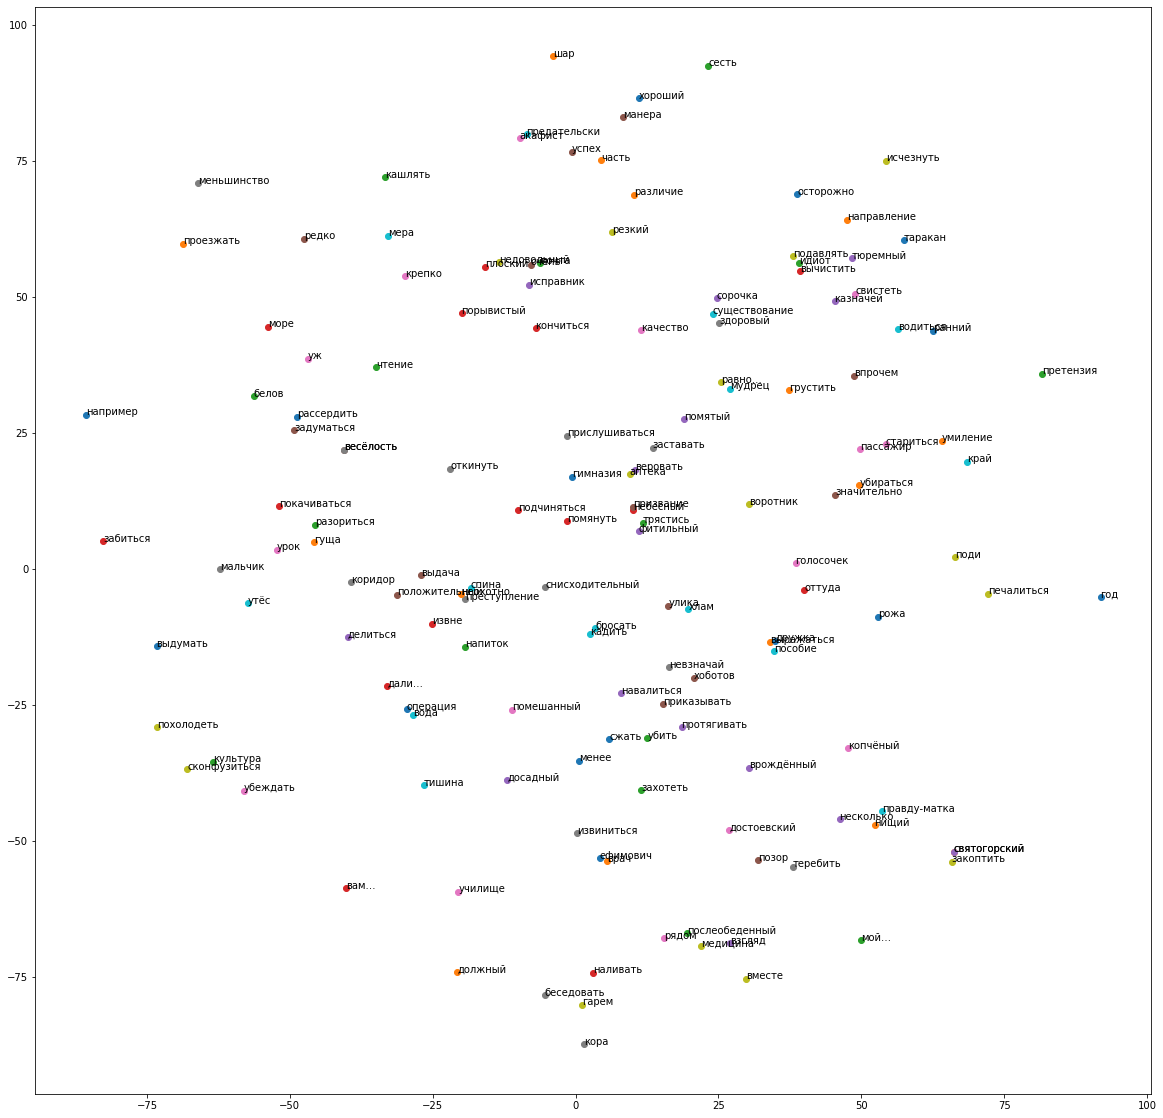

In [8]:
plt.figure(figsize=(20,20))

for x in range (150):
    rnd = np.random.RandomState().randint(0,df_TSNE.shape[0]-1)
    word = df_TSNE.iloc[rnd]
    x_c=list(word)[0]
    y_c=list(word)[1]
    plt.scatter(x=x_c, y=y_c)
    plt.annotate(word.name, (x_c, y_c))

In [9]:
list_of_words = df_unique_words.columns.tolist() #список всех уникальных слов

#преобразуем датасет в массив для последующей кластеризации

block_of_arrays = df_PCA.to_numpy ()

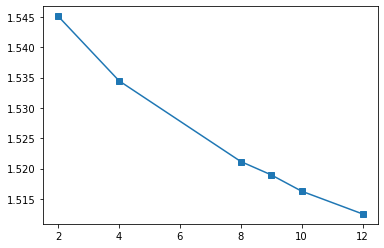

In [10]:
# Метод к-средних - KMeans
from sklearn.cluster import KMeans

km_list = []
aggl_list = []

K = [2, 4, 8, 9, 10, 12]

#определим количество кластеров доя текста
for i in K:
    k_means = KMeans(n_clusters=i, n_init=100, random_state=0).fit(block_of_arrays)
    km_list.append(np.sqrt(k_means.inertia_))
    
plt.plot(K, km_list,marker='s')

Исходя из графика, оптимальное количество кластеров для данного набора слов: 10

In [11]:
#запустим кластеризацию с оптимальным количеством кластеров
k_means = KMeans(n_clusters=10, n_init=100, random_state=0).fit(block_of_arrays)

In [12]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(list_of_words , k_means.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(list_of_words , k_means.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(list_of_words , k_means.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(block_of_arrays, k_means.labels_, sample_size=1000))

order_centroids = k_means.cluster_centers_.argsort()[:, ::-1]

Homogeneity: 0.283
Completeness: 1.000
V-measure: 0.441
Silhouette Coefficient: 0.008


In [13]:
#импортируем необходимые нам методы кластеризации
from sklearn.cluster import AgglomerativeClustering 

clustering = AgglomerativeClustering(n_clusters=10).fit(block_of_arrays)


print("Homogeneity: %0.3f" % metrics.homogeneity_score(list_of_words , clustering.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(list_of_words , clustering.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(list_of_words , clustering.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(block_of_arrays, clustering.labels_, sample_size=1000))


Homogeneity: 0.272
Completeness: 1.000
V-measure: 0.428
Silhouette Coefficient: -0.006


Выводы: 
Для векторизированного текста были применены методы иерархической кластеризации и кластеризации К-средних, для для которыз предварительно был найдено оптимальное количество кластеров. В соответствии с метриками, метод К-средних лучшие результаты, но в целом метрики в обоих случаях очень низкие. 